$m = (G^{T}G +\lambda I)^{-1} G^{T}Y$

where 

$G=
\begin{bmatrix}
x_{1}^{m} & x_{1}^{m-1} & \ldots & x_{1}^{2} & x_{1} & 1 \\
x_{2}^{m} & x_{2}^{m-1} & \ldots & x_{2}^{2} & x_{2} & 1 \\
\vdots & \vdots & \ddots & \vdots & \vdots  & \vdots\\
x_{Nd}^{m} & x_{Nd}^{m-1} & \ldots & x_{Nd}^{2} & x_{Nd} & 1 \\
\end{bmatrix}
$

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def plotting(x, y, m, xlabel, ylabel, polynomial_degree):
    plt.figure()
    plt.plot(x,y,'x')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{ylabel} Vs {xlabel}')
    xfine = np.linspace(np.min(x), np.max(x), 10*len(x))
    G = makeG(xfine, polynomial_degree)
    yfine = np.dot(G,m)
    plt.plot(xfine,yfine,'r--')

def makeG(x, polynomial_degree):
    G = np.zeros((len(x), polynomial_degree + 1))
    for power in range(polynomial_degree+1):
        G[:,-1-power] = x**power
    return G

def linearInversion(x, y, polynomial_degree, lam):
    G = makeG(x, polynomial_degree)
    Gt = G.T
    GtG = np.dot(Gt, G)
    regularization = lam * np.eye(polynomial_degree + 1)
    GtGinv = np.linalg.inv(GtG + regularization)
    m = np.dot(np.dot(GtGinv, Gt), y)
    return m

def getCost(x, y, m, polynomial_degree):
    G = makeG(x, polynomial_degree)
    yhat = np.dot(G,m)
    cost = np.linalg.norm(y-yhat,2)
    return cost

In [51]:
df = pd.read_csv('athletes.csv')
df_small = df.loc[:,['weight','height']].dropna()
height = df_small.height.values.T
weight = df_small.weight.values.T

[0.00531207 1.38409634]
7.673152589942511


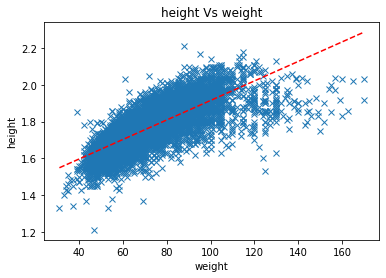

In [52]:
polynomial_degree = 1
model = linearInversion(weight, height, polynomial_degree, 0)
print(model)
print(getCost(weight, height, model, polynomial_degree))
plotting(weight, height, model, 'weight','height', polynomial_degree)
